# Imports

Esta tabla contiene la información de los imports a nivel de fichero (módulo).

## 1 - Obtencion de datos

In [1]:
import matplotlib.pyplot as plt
from notebooks_utils import *

full_table = get_data('imports')

# Table name, features and target.
TABLE_NAME = 'imports'
TABLE_FEATURES = ['import__number_imports', 'import__module_imports_pct', 'import__average_imported_modules', 'import__from_imports_pct', 'import__average_from_imported_modules', 'import__average_as_in_imported_modules', 'import__local_imports_pct', 'import__expertise_level']
TABLE_TARGET = 'import__expertise_level'

# Load features and target.
X, y = full_table[TABLE_FEATURES], full_table[[TABLE_TARGET]].iloc[:,0]

# Print information about the loaded table.
print(f'Features shape: {X.shape}')
print(f'Target shape: {y.shape}')

print(f'As we can see the downloaded data contains a total of {X.shape[0]} instances. Each of the instances corresponds to a program. For each program we have {X.shape[1]} attributes.')

2025-01-14 10:05:08.377991 Loading data ...
2025-01-14 10:05:09.331954 Data successfully load!!
2025-01-14 10:05:09.331954 Creating data cache files ...
2025-01-14 10:05:09.335952 Data cache files successfully created!!
Features shape: (7939, 8)
Target shape: (7939,)
As we can see the downloaded data contains a total of 7939 instances. Each of the instances corresponds to a program. For each program we have 8 attributes.


## 2 - Exploracion de datos

Una vez tenemos nuestra tabla en un dataframe el siguiente paso es explorarla para ver qué tipo de información contiene.

In [2]:
print(X.info())
print('=============')
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7939 entries, 0 to 7938
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   import__number_imports                  7939 non-null   int64  
 1   import__module_imports_pct              7939 non-null   float64
 2   import__average_imported_modules        7939 non-null   float64
 3   import__from_imports_pct                7939 non-null   float64
 4   import__average_from_imported_modules   7939 non-null   float64
 5   import__average_as_in_imported_modules  7939 non-null   float64
 6   import__local_imports_pct               7939 non-null   float64
 7   import__expertise_level                 7939 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 496.3+ KB
None
<class 'pandas.core.series.Series'>
RangeIndex: 7939 entries, 0 to 7938
Series name: import__expertise_level
Non-Null Count  Dtype 
---

Cómo podemos ver la tabla está compuesta por 7 variables numéricas y una de tipo objeto. 

### 2.1 - Equilibrado de clases

In [3]:
instances_for_class_low = len(full_table[full_table[TABLE_TARGET] == "BEGINNER"])
instances_for_class_high = len(full_table[full_table[TABLE_TARGET] == "PROFESSIONAL"])

print(f"The dataset contains {instances_for_class_low/len(full_table)*100:.4}% instances for BEGINNER class and {instances_for_class_high/len(full_table)*100:.4}% for PROFESSIONAL class.")

The dataset contains 49.31% instances for BEGINNER class and 0.0% for EXPERT class.


### 2.2 - Valores Nulos 
Miramos si alguna de las variables que contiene la tabla contiene algún valor que sea nulo.

In [4]:
X.isnull().sum()

import__number_imports                    0
import__module_imports_pct                0
import__average_imported_modules          0
import__from_imports_pct                  0
import__average_from_imported_modules     0
import__average_as_in_imported_modules    0
import__local_imports_pct                 0
import__expertise_level                   0
dtype: int64

Aunque una columna no contenga valores nulos podría ser que contenga valores vacíos.

In [5]:
print_empty_cols(X)

import__number_imports
----------------------
0 instancias no tienen un valor para la columna import__number_imports


import__module_imports_pct
--------------------------
0 instancias no tienen un valor para la columna import__module_imports_pct


import__average_imported_modules
--------------------------------
0 instancias no tienen un valor para la columna import__average_imported_modules


import__from_imports_pct
------------------------
0 instancias no tienen un valor para la columna import__from_imports_pct


import__average_from_imported_modules
-------------------------------------
0 instancias no tienen un valor para la columna import__average_from_imported_modules


import__average_as_in_imported_modules
--------------------------------------
0 instancias no tienen un valor para la columna import__average_as_in_imported_modules


import__local_imports_pct
-------------------------
0 instancias no tienen un valor para la columna import__local_imports_pct


import__expertise

### 2.3 - Describimos los valores de las variables de la tabla.

In [6]:
np.transpose(X.describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
import__number_imports,7939.0,NaN,NaN,NaN,2.972037,3.919989,0.0,0.0,2.0,4.0,62.0
import__module_imports_pct,7939.0,NaN,NaN,NaN,0.20263,0.340738,0.0,0.0,0.0,0.269697,1.0
import__average_imported_modules,7939.0,NaN,NaN,NaN,0.380682,0.527359,0.0,0.0,0.0,1.0,6.0
import__from_imports_pct,7939.0,NaN,NaN,NaN,0.480832,0.451857,0.0,0.0,0.5,1.0,1.0
import__average_from_imported_modules,7939.0,NaN,NaN,NaN,0.844323,0.943579,0.0,0.0,1.0,1.333333,16.0
import__average_as_in_imported_modules,7939.0,NaN,NaN,NaN,0.00487,0.049473,0.0,0.0,0.0,0.0,1.0
import__local_imports_pct,7939.0,NaN,NaN,NaN,0.530239,0.49707,0.0,0.0,1.0,1.0,1.0
import__expertise_level,7939,2,PROFESSIONAL,4024,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Vamos a discretizar las variables numericas, agrupando conjuntos de valores en categorias, para hacer un análisis de los datos. Para cada variable es necesaario ver la distribucion de lo valores para hacer los bins (categorias).

In [7]:
# DISCRETIZATION
X_copy = X.copy()

discretized_columns = {
    "import__number_imports": [(0, 0), (0, 3), (3, 7), (7, inf)],  # min: 0 max: 194 
    "import__module_imports_pct": [(0.0, 0.0), (0.0, 0.5), (0.5, 1), (1, 1)],  # min: 0.0 max: 1.0 
    "import__average_imported_modules": [(0.0, 0.0), (0.0, inf)],  # min: 0.0 max: 8.5 
    "import__from_imports_pct": [(0.0, 0.0), (0.0, 0.5), (0.5, 1), (1, 1)],  # min: 0.0 max: 1.0 
    "import__average_from_imported_modules": [(0.0, 0.0), (0.0, 2.0), (2.0, inf)],  # min: 0.0 max: 23.0 
    "import__average_as_in_imported_modules": [(0.0, 0.0), (0.0, inf)],  # min: 0.0 max: 1.0 
    "import__local_imports_pct": [(0.0, 0.0), (0.0, 1.0), (1.0, 1.0)],  # min: 0.0 max: 1.0 
}

discretize_columns(X_copy, discretized_columns)
    
# SINGLE FEATURE
print("--- SINGLE FEATURE ---")
print(get_statistics(X_copy, ['import__number_imports'], 10))
print(get_statistics(X_copy, ['import__module_imports_pct'], 10))
print(get_statistics(X_copy, ['import__average_imported_modules'], 10))
print(get_statistics(X_copy, ['import__from_imports_pct'], 10))
print(get_statistics(X_copy, ['import__average_from_imported_modules'], 10))
print(get_statistics(X_copy, ['import__average_as_in_imported_modules'], 10))
print(get_statistics(X_copy, ['import__local_imports_pct'], 10))

# 2 FEATURES
print("--- TWO FEATURES ---")
print(get_statistics(X_copy, ['import__average_imported_modules', 'import__module_imports_pct'], 10))

# 3 FEATURES
print("--- THREE FEATURES ---")
#print(get_statistics(X_copy, ['program__has_sub_dirs_with_code', 'program__has_packages', 'program__has_code_root_package'], 10))

--- SINGLE FEATURE ---
import__number_imports  count  percentage
                 [0_0]   2513   31.653861
                 [0_3)   2434   30.658773
                 [3_7)   1786   22.496536
               [7_inf]   1206   15.190830

import__module_imports_pct  count  percentage
                 [0.0_0.0]   5015   63.169165
                 [0.0_0.5)   1428   17.987152
                     [1_1]    970   12.218163
                   [0.5_1)    526    6.625520

import__average_imported_modules  count  percentage
                       [0.0_0.0]   5015   63.169165
                       [0.0_inf]   2924   36.830835

import__from_imports_pct  count  percentage
               [0.0_0.0]   3483   43.872024
                   [1_1]   2502   31.515304
                 [0.5_1)   1707   21.501449
               [0.0_0.5)    247    3.111223

import__average_from_imported_modules  count  percentage
                            [0.0_2.0)   3502   44.111349
                            [0.0_0.0]   348

In [8]:
def normalize_datatypes(X:pd.DataFrame, y:pd.Series) -> (pd.DataFrame, pd.Series, [str]):
    X = pd.get_dummies(X)
    X = X.astype('float32')
    y = y.apply(lambda value: 0 if value == "BEGINNER" else 1) # EXPERT will be 1 and BEGINNER will be 0.
    y = y.astype('float32')
    columns_names = X.columns.tolist()
    return X, y, columns_names

X, y, TABLE_FEATURES = normalize_datatypes(X, y)
# Print information about the loaded table
print(f'Features shape: {X.shape}')
print(f'Target shape: {y.shape}')

Features shape: (7939, 9)
Target shape: (7939,)


#### Muestra la matriz de correlación de Spearman entre las variables de la tabla.

<Axes: >

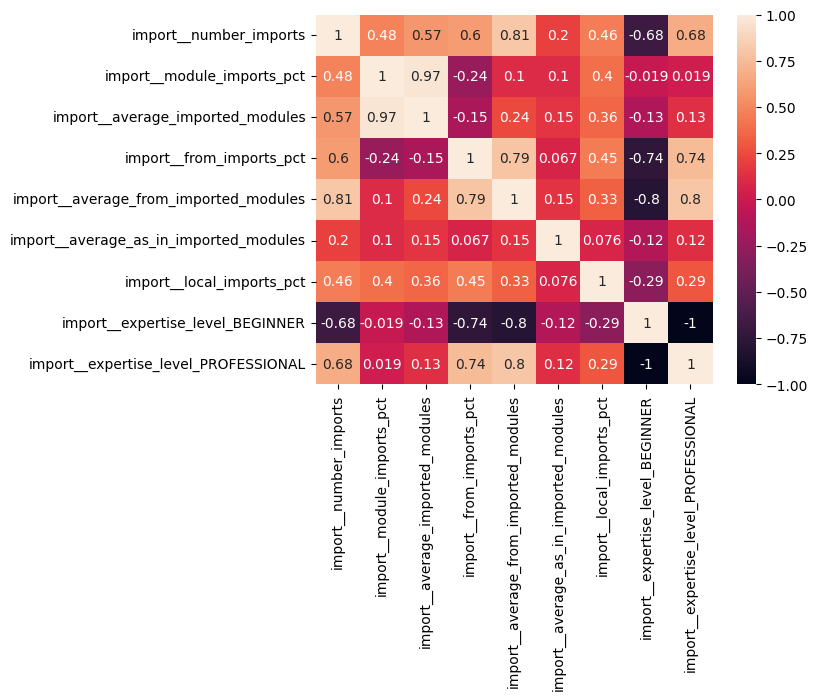

In [9]:
sns.heatmap(X.corr(method='spearman'), annot=True)

## 3 - Detección de valores atípicos (outliers)
## Univariate
## Analisis detallado de variables
Para cada una de las 7 variable (3 porcentuales y 4 numericas)

### Variable number_imports (1/7)
Esta variable es de tipo numérica y nos indica el número imports definidos en el fichero. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 62. Con una media de 2.97.

<Axes: ylabel='import__number_imports'>

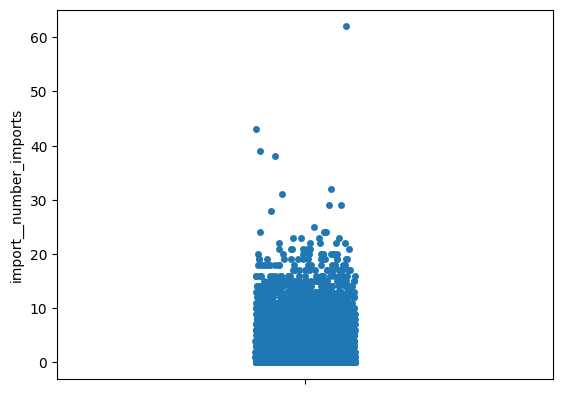

In [10]:
sns.stripplot(X['import__number_imports'])

### IMPORTANTE
Los tres valores máximos están muy alejados del siguiente.

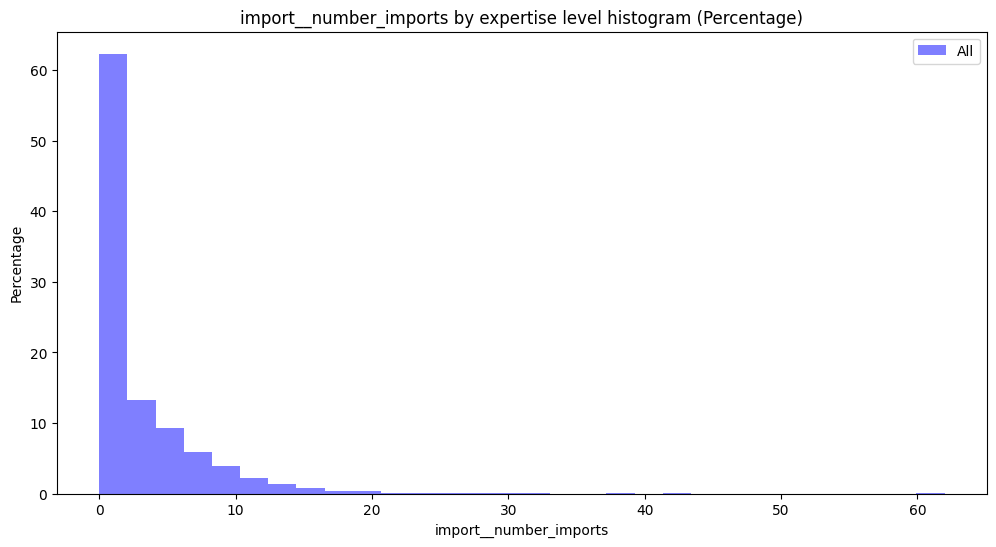

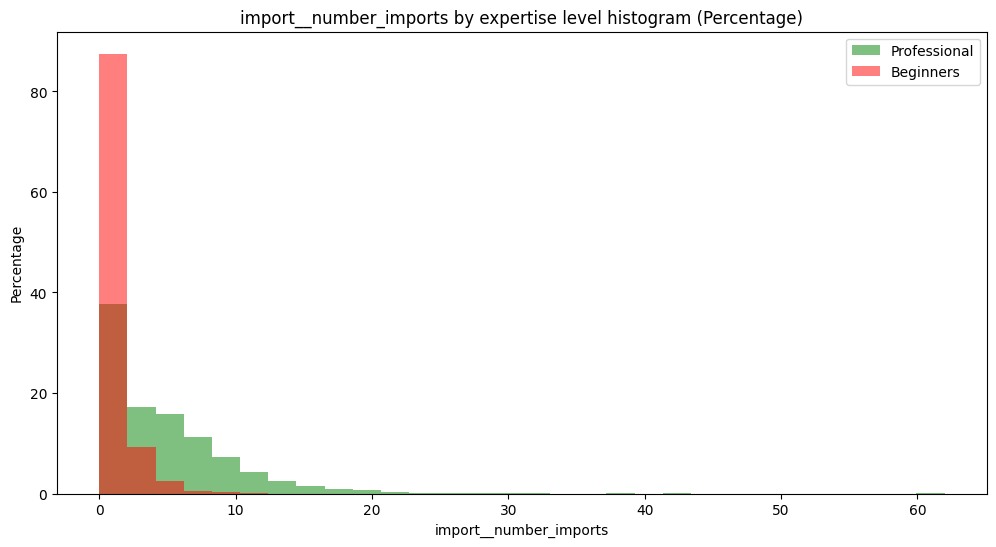

In [11]:
print_histogram(X, 'import__number_imports', 'module__expertise_level', bins=30, include_all=True, include_experts=False, include_beginners=False)
print_histogram(X, 'import__number_imports', 'import__expertise_level', bins=30, include_all=False)

In [12]:
print_outliers_for_df_column(X, 'import__number_imports')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.48333646107329387
Rango valores atípicos extremos (Tukey): [-12.0,16.0]
Rango valores atípicos leves (Tukey): [-6.0,10.0]
Rango valores atípicos extremos (Fixed BoxPlot): [-1.1052613860648635,45.47560045636638]
-3.0IQR: 0 instancias tienen un valor para import__number_imports inferior a -12.0 (Q1-3*IQR) para import__number_imports. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para import__number_imports inferior a -6.0 (Q1-1.5*IQR) para import__number_imports. Representando un 0.0% del total de instancias.
+1.5IQR: 427 instancias tienen un valor para import__number_imports superior a 10.0 (Q3+1.5*IQR) para import__number_imports. Representando un 5.379% del total de instancias.
+3.0IQR: 88 instancias tienen un valor para import__number_imports superior a 16.0 (Q3-3*IQR) para import__number_imports. Representando un 1.108% del total de instancias.
L: 0 instancias tienen un valor para impo

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 123.8 (Con un MC de 48 usamos Tukey)

In [41]:
X[X['import__number_imports'] > 16].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,import__number_imports,import__module_imports_pct,import__average_imported_modules,import__from_imports_pct,import__average_from_imported_modules,import__average_as_in_imported_modules,import__local_imports_pct,import__expertise_level_BEGINNER,import__expertise_level_PROFESSIONAL
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.0,88.0
mean,21.147728,0.113491,0.829545,0.886509,1.745653,0.011248,0.600253,0.0,1.0
std,6.531163,0.111716,0.378187,0.111716,0.445170,0.030999,0.486621,0.0,0.0
min,17.000000,0.000000,0.000000,0.444444,1.000000,0.000000,0.000000,0.0,1.0
25%,18.000000,0.050000,1.000000,0.845833,1.463636,0.000000,0.000000,0.0,1.0
50%,19.000000,0.085145,1.000000,0.914855,1.666667,0.000000,1.000000,0.0,1.0
75%,21.250000,0.154167,1.000000,0.950000,2.013158,0.000000,1.000000,0.0,1.0
max,62.000000,0.555556,1.000000,1.000000,4.000000,0.160000,1.000000,0.0,1.0


### Variable average_imported_modules (2/7)
Esta variable representa el número medio de alias importados en cada clausula import. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 6. Con una media de 0.38.

<Axes: ylabel='import__average_imported_modules'>

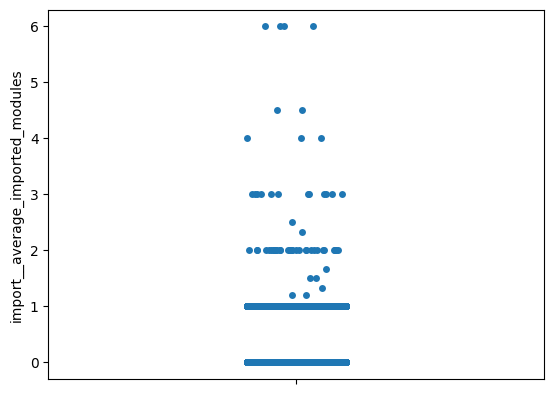

In [14]:
sns.stripplot(X['import__average_imported_modules'])

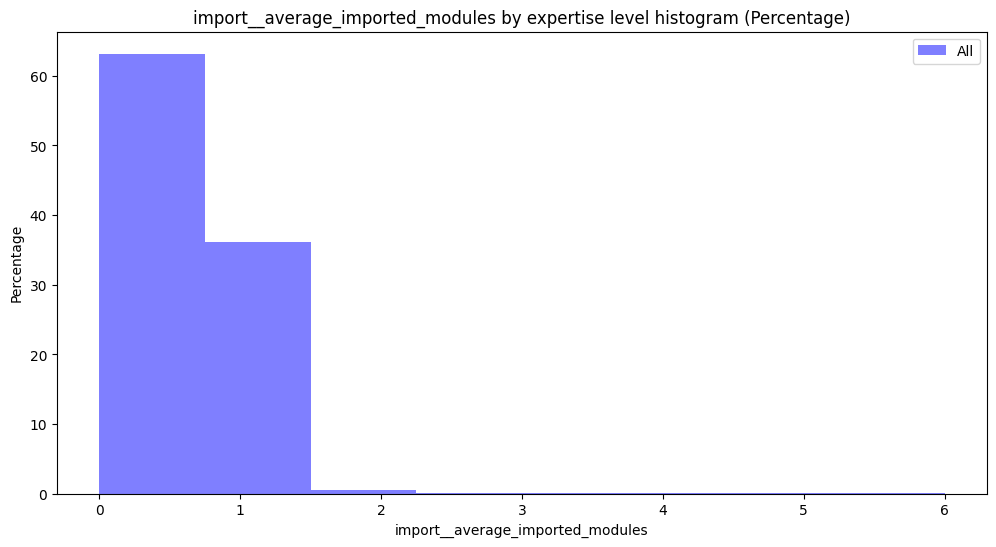

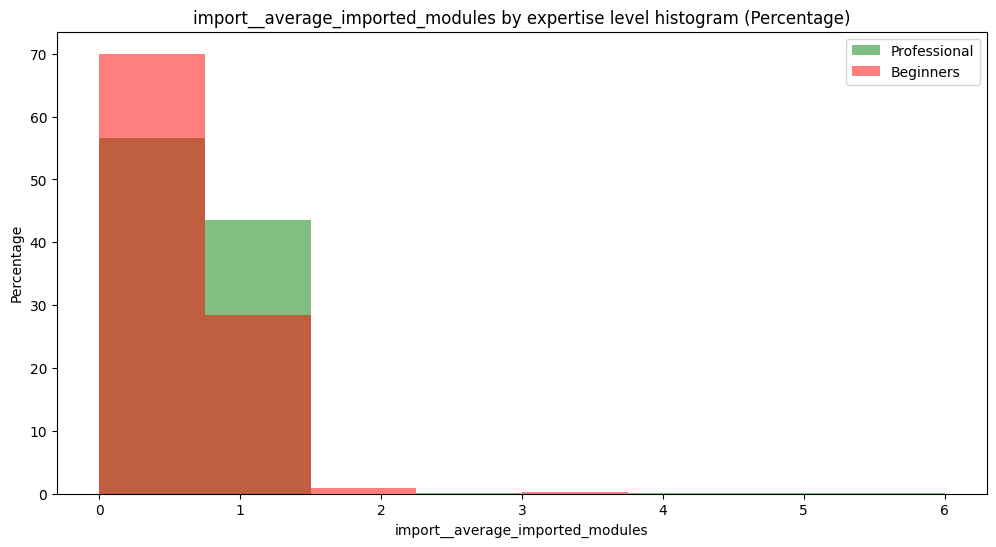

In [15]:
print_histogram(X, 'import__average_imported_modules', 'module__expertise_level', bins=8, include_all=True, include_experts=False, include_beginners=False)
print_histogram(X, 'import__average_imported_modules', 'import__expertise_level', bins=8, include_all=False)

In [16]:
print_outliers_for_df_column(X, 'import__average_imported_modules')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.8059113591014613
Rango valores atípicos extremos (Tukey): [-3.0,4.0]
Rango valores atípicos leves (Tukey): [-1.5,2.5]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.08934726491593072,38.67928765901782]
-3.0IQR: 0 instancias tienen un valor para import__average_imported_modules inferior a -3.0 (Q1-3*IQR) para import__average_imported_modules. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para import__average_imported_modules inferior a -1.5 (Q1-1.5*IQR) para import__average_imported_modules. Representando un 0.0% del total de instancias.
+1.5IQR: 21 instancias tienen un valor para import__average_imported_modules superior a 2.5 (Q3+1.5*IQR) para import__average_imported_modules. Representando un 0.2645% del total de instancias.
+3.0IQR: 6 instancias tienen un valor para import__average_imported_modules superior a 4.0 (Q3-3*IQR) para import__average_imported_modules. Representando un 

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 4.0 (Con un MC de 80 usamos Tukey Extremo)

In [43]:
X[X['import__average_imported_modules'] > 4].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,import__number_imports,import__module_imports_pct,import__average_imported_modules,import__from_imports_pct,import__average_from_imported_modules,import__average_as_in_imported_modules,import__local_imports_pct,import__expertise_level_BEGINNER,import__expertise_level_PROFESSIONAL
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.0,6.000000,6.0,6.0
mean,1.833333,0.750000,5.500000,0.250000,0.500000,0.0,0.500000,1.0,0.0
std,0.408248,0.273861,0.774597,0.273861,0.547723,0.0,0.547723,0.0,0.0
min,1.000000,0.500000,4.500000,0.000000,0.000000,0.0,0.000000,1.0,0.0
25%,2.000000,0.500000,4.875000,0.000000,0.000000,0.0,0.000000,1.0,0.0
50%,2.000000,0.750000,6.000000,0.250000,0.500000,0.0,0.500000,1.0,0.0
75%,2.000000,1.000000,6.000000,0.500000,1.000000,0.0,1.000000,1.0,0.0
max,2.000000,1.000000,6.000000,0.500000,1.000000,0.0,1.000000,1.0,0.0


### Variable average_from_imported_modules (3/7)
Esta variable representa el número medio de imports con la clausula From. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 16. Con una media de 0.84.

<Axes: ylabel='import__average_from_imported_modules'>

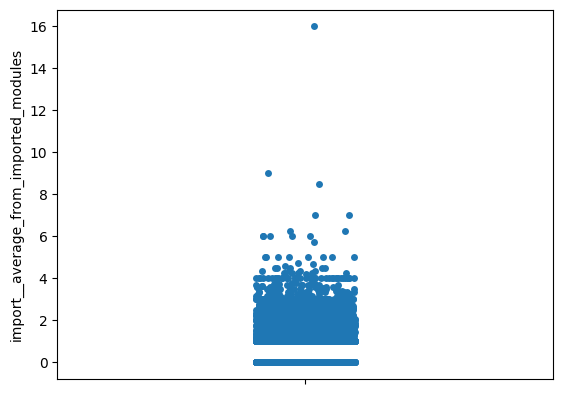

In [18]:
sns.stripplot(X['import__average_from_imported_modules'])

### IMPORTANTE
Los valores máximos están muy alejados del siguiente. 

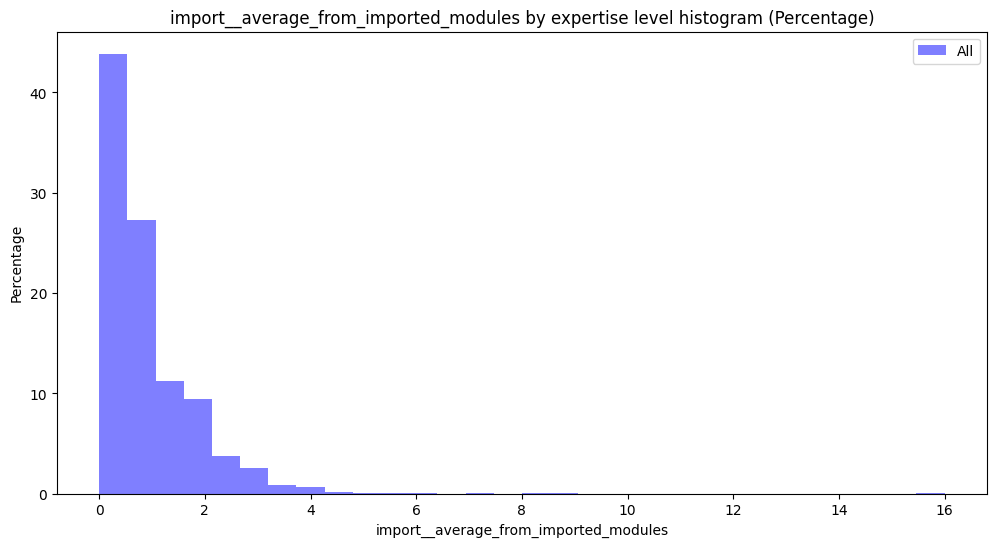

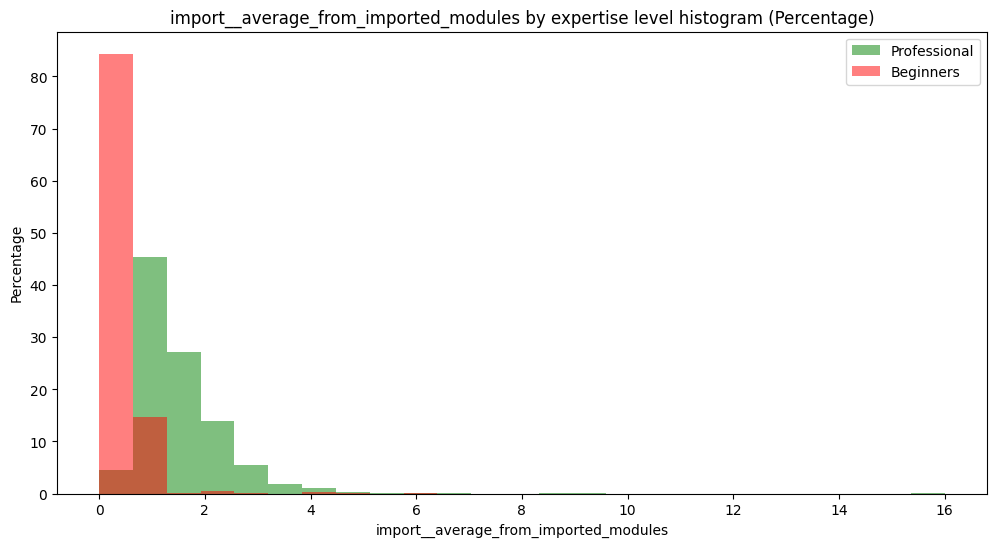

In [19]:
print_histogram(X, 'import__average_from_imported_modules', 'module__expertise_level', bins=30, include_all=True, include_experts=False, include_beginners=False)
print_histogram(X, 'import__average_from_imported_modules', 'import__expertise_level', bins=25, include_all=False)

In [20]:
print_outliers_for_df_column(X, 'import__average_from_imported_modules')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.8668825294809168
Rango valores atípicos extremos (Tukey): [-4.0000001192092896,5.333333492279053]
Rango valores atípicos leves (Tukey): [-2.0000000596046448,3.333333432674408]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.09623697469452809,65.44826812806681]
-3.0IQR: 0 instancias tienen un valor para import__average_from_imported_modules inferior a -4.0000001192092896 (Q1-3*IQR) para import__average_from_imported_modules. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para import__average_from_imported_modules inferior a -2.0000000596046448 (Q1-1.5*IQR) para import__average_from_imported_modules. Representando un 0.0% del total de instancias.
+1.5IQR: 129 instancias tienen un valor para import__average_from_imported_modules superior a 3.333333432674408 (Q3+1.5*IQR) para import__average_from_imported_modules. Representando un 1.625% del total de instancias.
+3.0IQR: 13 instancias tie

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 6.28 (Con un MC de 90 usamos Tuckey Extremo)

In [44]:
X[X['import__average_from_imported_modules'] > 5.33].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,import__number_imports,import__module_imports_pct,import__average_imported_modules,import__from_imports_pct,import__average_from_imported_modules,import__average_as_in_imported_modules,import__local_imports_pct,import__expertise_level_BEGINNER,import__expertise_level_PROFESSIONAL
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.0,13.000000,13.000000,13.000000
mean,3.076923,0.232742,0.461538,0.767258,7.365385,0.0,0.692308,0.076923,0.923077
std,3.174417,0.280143,0.518875,0.280143,2.786903,0.0,0.480384,0.277350,0.277350
min,1.000000,0.000000,0.000000,0.307692,5.750000,0.0,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.500000,6.000000,0.0,0.000000,0.000000,1.000000
50%,2.000000,0.000000,0.000000,1.000000,6.250000,0.0,1.000000,0.000000,1.000000
75%,3.000000,0.500000,1.000000,1.000000,7.000000,0.0,1.000000,0.000000,1.000000
max,13.000000,0.692308,1.000000,1.000000,16.000000,0.0,1.000000,1.000000,1.000000


### Variable average_as_in_imported_modules (4/7)
Esta variable es de tipo numérica y nos indica el número medio de import con la cláusula as. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 1. Con una media de 0.0048.

<Axes: ylabel='import__average_as_in_imported_modules'>

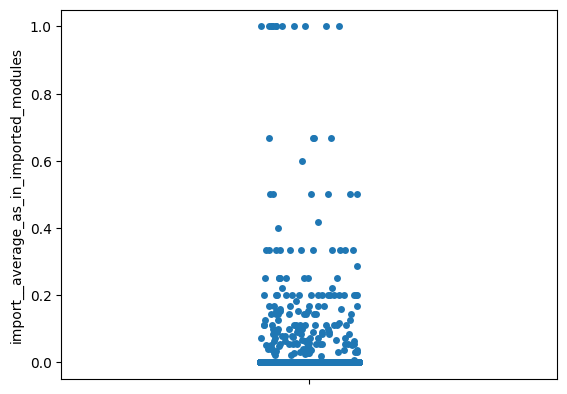

In [22]:
sns.stripplot(X['import__average_as_in_imported_modules'])

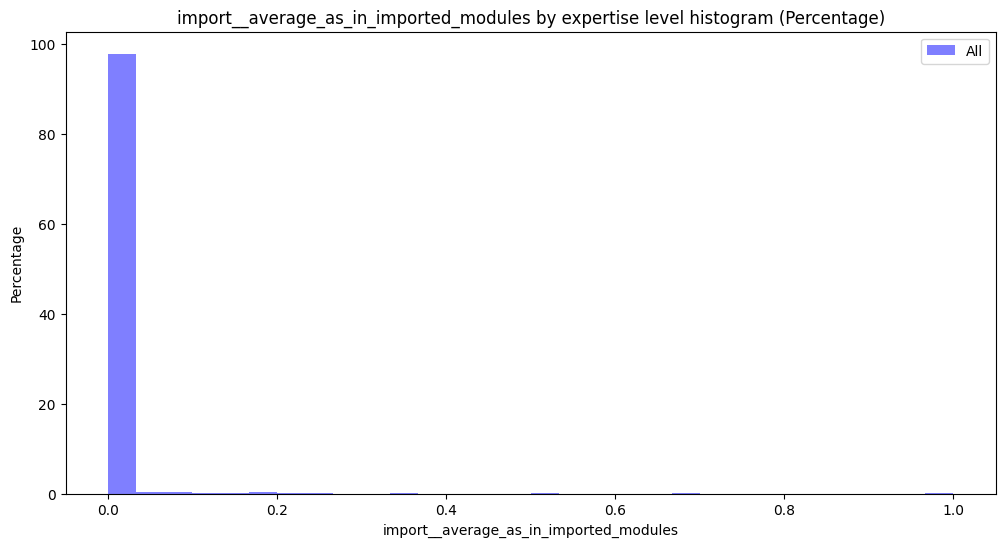

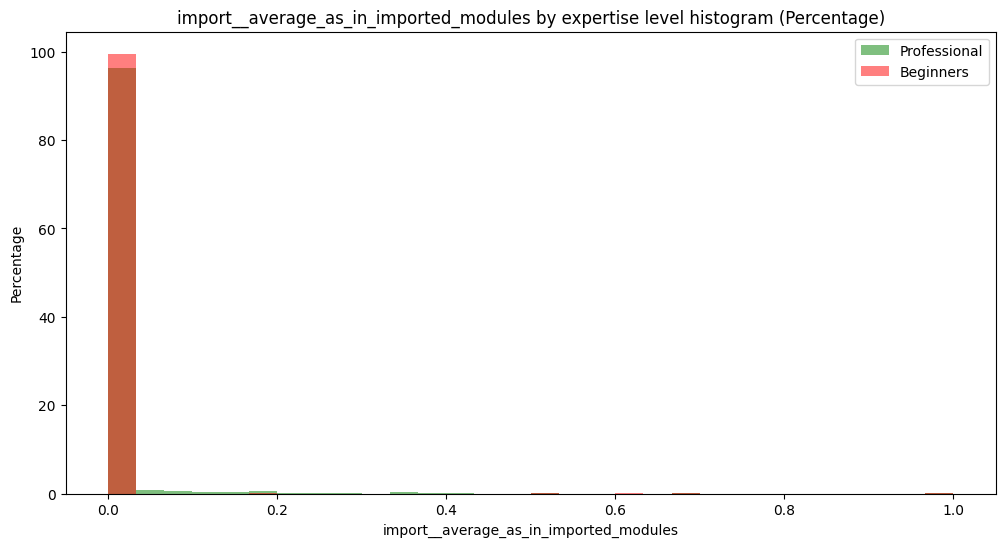

In [23]:
print_histogram(X, 'import__average_as_in_imported_modules', 'module__expertise_level', bins=30, include_all=True, include_experts=False, include_beginners=False)
print_histogram(X, 'import__average_as_in_imported_modules', 'import__expertise_level', bins=30, include_all=False)

In [24]:
print_outliers_for_df_column(X, 'import__average_as_in_imported_modules')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.9483486179491749
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para import__average_as_in_imported_modules inferior a 0.0 (Q1-3*IQR) para import__average_as_in_imported_modules. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para import__average_as_in_imported_modules inferior a 0.0 (Q1-1.5*IQR) para import__average_as_in_imported_modules. Representando un 0.0% del total de instancias.
+1.5IQR: 178 instancias tienen un valor para import__average_as_in_imported_modules superior a 0.0 (Q3+1.5*IQR) para import__average_as_in_imported_modules. Representando un 2.242% del total de instancias.
+3.0IQR: 178 instancias tienen un valor para import__average_as_in_imported_modules superior a 0.0 (Q3-3*IQR) para import__average_as_in_imported_modules. Re

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0.0 (Con un MC de 90 usamos Tuckey Extremo)

In [25]:
X[X['import__average_as_in_imported_modules'] > 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,import__number_imports,import__module_imports_pct,import__average_imported_modules,import__from_imports_pct,import__average_from_imported_modules,import__average_as_in_imported_modules,import__local_imports_pct,import__expertise_level_BEGINNER,import__expertise_level_PROFESSIONAL
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,9.674157,0.232861,0.882023,0.767139,1.598457,0.217198,0.781515,0.095506,0.904494
std,6.654976,0.175213,0.454248,0.175213,0.624989,0.251774,0.407097,0.294741,0.294741
min,1.000000,0.000000,0.000000,0.333333,1.000000,0.007692,0.000000,0.000000,0.000000
25%,6.000000,0.100000,1.000000,0.666667,1.000000,0.062500,1.000000,0.000000,1.000000
50%,9.000000,0.200000,1.000000,0.800000,1.434286,0.125000,1.000000,0.000000,1.000000
75%,12.000000,0.333333,1.000000,0.900000,2.000000,0.243056,1.000000,0.000000,1.000000
max,62.000000,0.666667,3.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000


### Variable module_imports_pct (5/7)
Esta variable representa la proporción de import simples del fichero. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0.0 - 1.0. Con una media de 0.202.

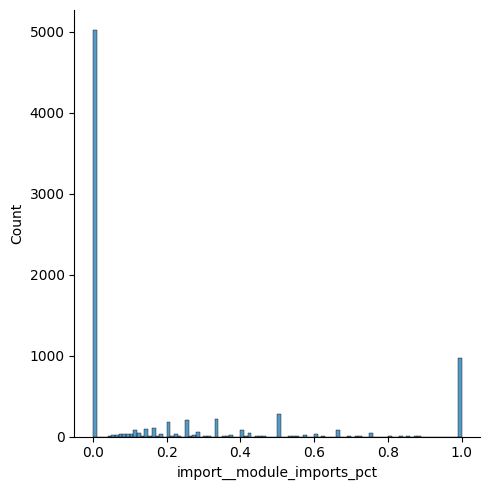

In [26]:
sns.displot(X['import__module_imports_pct'], bins=[i / 100 for i in range(0, 101)])

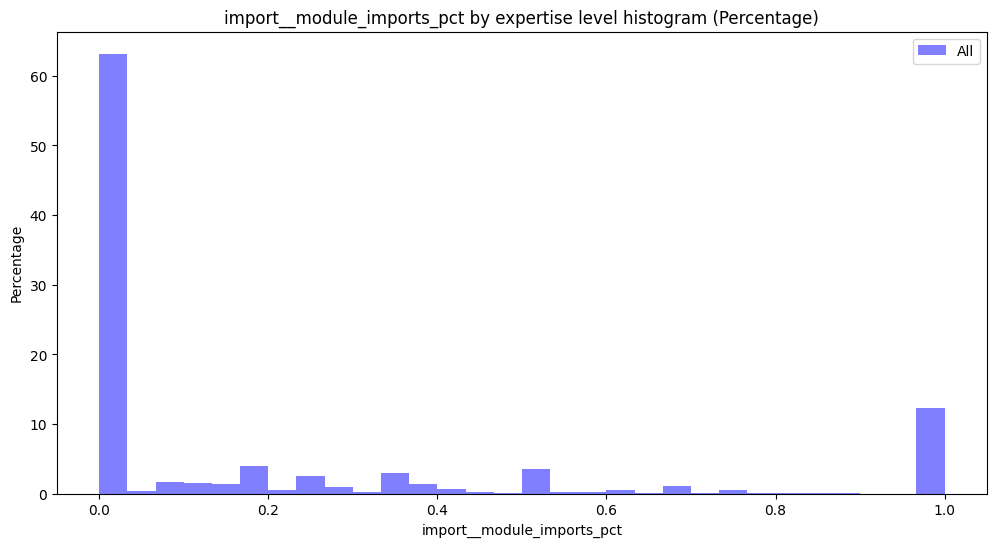

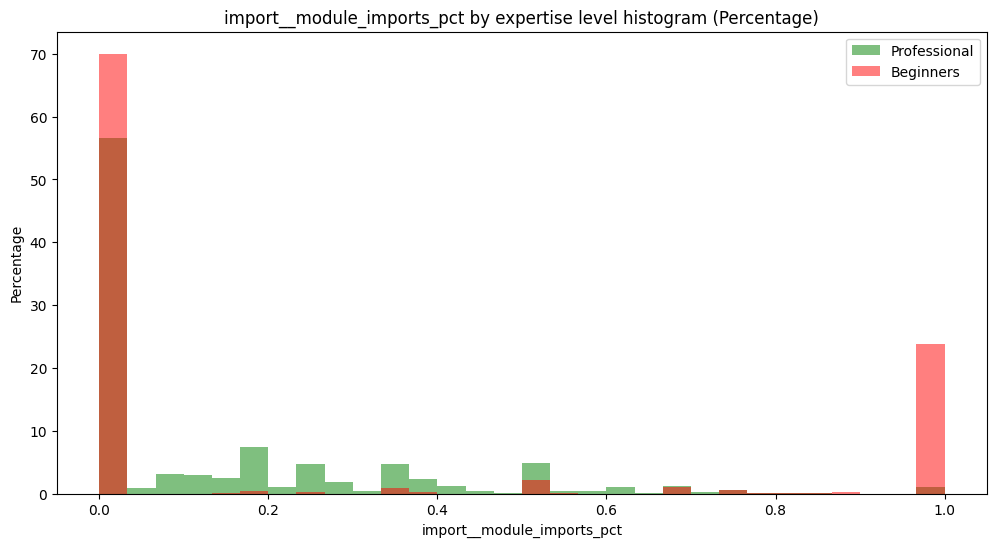

In [27]:
print_histogram(X, 'import__module_imports_pct', 'module__expertise_level', bins=30, include_all=True, include_experts=False, include_beginners=False)
print_histogram(X, 'import__module_imports_pct', 'import__expertise_level', bins=30, include_all=False)

In [28]:
print_outliers_for_df_column(X, 'import__module_imports_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.5210294591168125
Rango valores atípicos extremos (Tukey): [-0.8090909421443939,1.078787922859192]
Rango valores atípicos leves (Tukey): [-0.40454547107219696,0.6742424517869949]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.06531103663409138,3.5212303815057937]
-3.0IQR: 0 instancias tienen un valor para import__module_imports_pct inferior a -0.8090909421443939 (Q1-3*IQR) para import__module_imports_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para import__module_imports_pct inferior a -0.40454547107219696 (Q1-1.5*IQR) para import__module_imports_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 1054 instancias tienen un valor para import__module_imports_pct superior a 0.6742424517869949 (Q3+1.5*IQR) para import__module_imports_pct. Representando un 13.28% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para import__module_imports_pct superior a 1.078

In [29]:
X[X['import__module_imports_pct'] == 1.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,import__number_imports,import__module_imports_pct,import__average_imported_modules,import__from_imports_pct,import__average_from_imported_modules,import__average_as_in_imported_modules,import__local_imports_pct,import__expertise_level_BEGINNER,import__expertise_level_PROFESSIONAL
count,970.000000,970.0,970.000000,970.0,970.0,970.0,970.000000,970.000000,970.000000
mean,1.846392,1.0,1.069828,0.0,0.0,0.0,0.965022,0.959794,0.040206
std,1.259069,0.0,0.374198,0.0,0.0,0.0,0.182424,0.196544,0.196544
min,1.000000,1.0,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
25%,1.000000,1.0,1.000000,0.0,0.0,0.0,1.000000,1.000000,0.000000
50%,1.000000,1.0,1.000000,0.0,0.0,0.0,1.000000,1.000000,0.000000
75%,2.000000,1.0,1.000000,0.0,0.0,0.0,1.000000,1.000000,0.000000
max,11.000000,1.0,6.000000,0.0,0.0,0.0,1.000000,1.000000,1.000000


### IMPORTANTE
El 40% de los imports tienen module_imports_pct = 0.0

### Variable from_imports_pct (6/7)
Esta variable representa la proporción de imports que usan la clausula From en el fichero. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0.0 - 1.0. Con una media de 0.48.


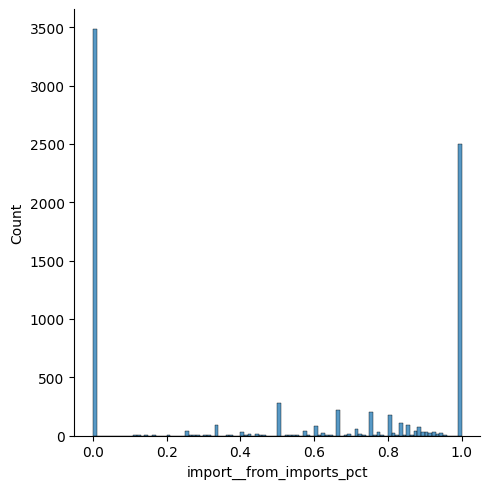

In [30]:
sns.displot(X['import__from_imports_pct'], bins=[i / 100 for i in range(0, 101)])

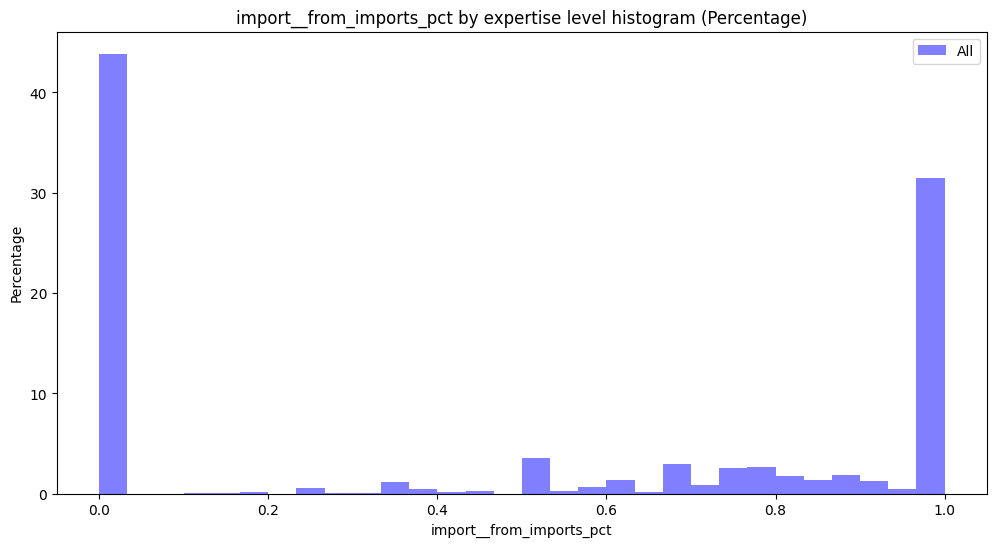

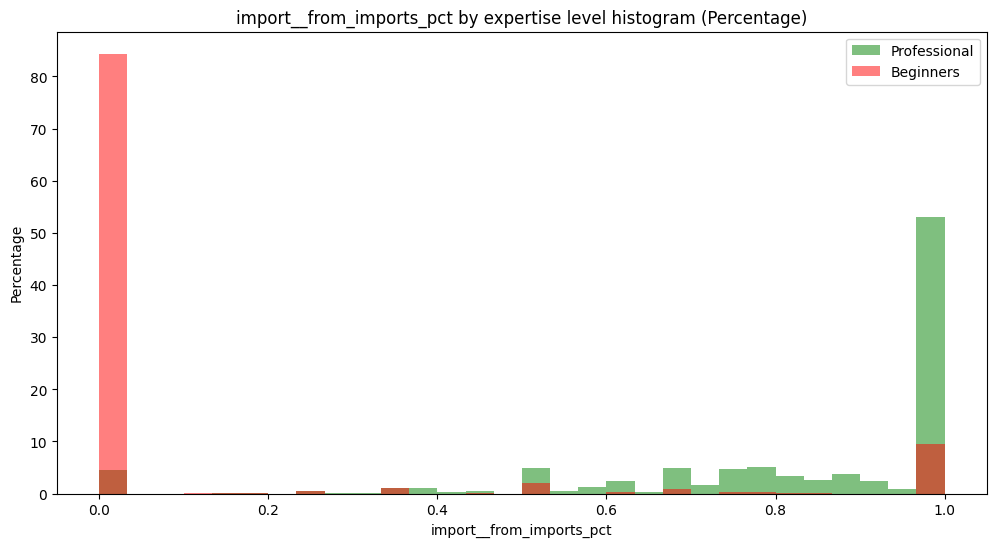

In [31]:
print_histogram(X, 'import__from_imports_pct', 'module__expertise_level', bins=30, include_all=True, include_experts=False, include_beginners=False)
print_histogram(X, 'import__from_imports_pct', 'import__expertise_level', bins=30, include_all=False)

In [32]:
print_outliers_for_df_column(X, 'import__from_imports_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.43924013017889335
Rango valores atípicos extremos (Tukey): [-3.0,4.0]
Rango valores atípicos leves (Tukey): [-1.5,2.5]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.32242802449407904,9.692196149618878]
-3.0IQR: 0 instancias tienen un valor para import__from_imports_pct inferior a -3.0 (Q1-3*IQR) para import__from_imports_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para import__from_imports_pct inferior a -1.5 (Q1-1.5*IQR) para import__from_imports_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 0 instancias tienen un valor para import__from_imports_pct superior a 2.5 (Q3+1.5*IQR) para import__from_imports_pct. Representando un 0.0% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para import__from_imports_pct superior a 4.0 (Q3-3*IQR) para import__from_imports_pct. Representando un 0.0% del total de instancias.
L: 0 instancias tienen un valor para 

IMPORTANTE: Estos valores siguen un distribucion en forma de U (distribucion de Laplace). Con lo que los posibles valores outliers estan en el medio, no en los extremos. No se puede aplicar el metodo de tukey. En este momento, solo vamos a mostrar los valores que hay en el medio.

In [33]:
X[(X['import__from_imports_pct'] > 0.0) & (X['import__from_imports_pct'] < 1.0)].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,import__number_imports,import__module_imports_pct,import__average_imported_modules,import__from_imports_pct,import__average_from_imported_modules,import__average_as_in_imported_modules,import__local_imports_pct,import__expertise_level_BEGINNER,import__expertise_level_PROFESSIONAL
count,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000
mean,7.124360,0.326856,1.015609,0.673144,1.685159,0.015547,0.661332,0.124360,0.875640
std,4.341112,0.187732,0.222601,0.187732,0.769980,0.081841,0.466392,0.330077,0.330077
min,2.000000,0.043478,1.000000,0.111111,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,0.166667,1.000000,0.500000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,6.000000,0.285714,1.000000,0.714286,1.500000,0.000000,1.000000,0.000000,1.000000
75%,9.000000,0.500000,1.000000,0.833333,2.000000,0.000000,1.000000,0.000000,1.000000
max,62.000000,0.888889,6.000000,0.956522,7.000000,1.000000,1.000000,1.000000,1.000000


### IMPORTANTE
El 28% tienen un 0% y el 25% tienen un 100%.

### Variable local_imports_pct (7/7)
Esta variable representa la proporción de imports no escritos al comienzo del fichero. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0.0 - 1.0. Con una media de 0.53. 

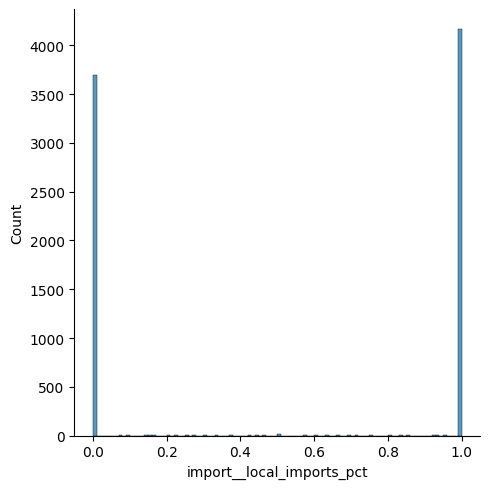

In [34]:
sns.displot(X['import__local_imports_pct'], bins=[i / 100 for i in range(0, 101)])

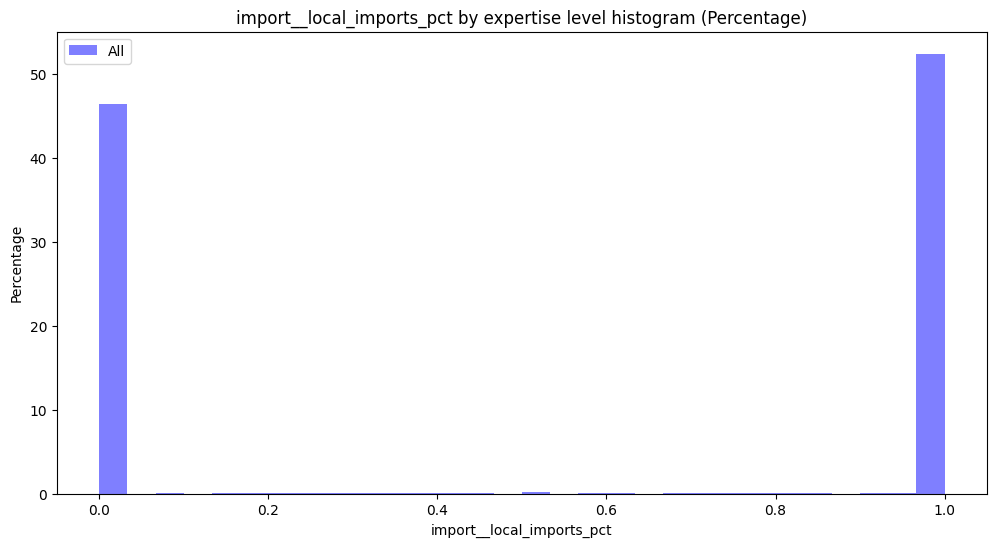

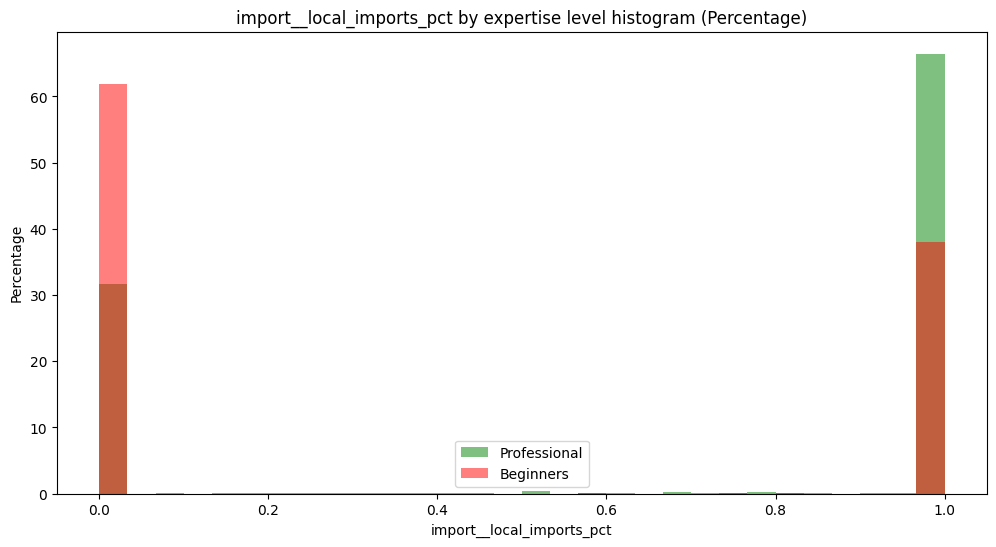

In [35]:
print_histogram(X, 'import__local_imports_pct', 'module__expertise_level', bins=30, include_all=True, include_experts=False, include_beginners=False)
print_histogram(X, 'import__local_imports_pct', 'import__expertise_level', bins=30, include_all=False)

In [36]:
print_outliers_for_df_column(X, 'import__local_imports_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: -0.0659508611697858
Rango valores atípicos extremos (Tukey): [-3.0,4.0]
Rango valores atípicos leves (Tukey): [-1.5,2.5]
Rango valores atípicos extremos (Fixed BoxPlot): [-1.9528084218405484,2.190813984663972]
-3.0IQR: 0 instancias tienen un valor para import__local_imports_pct inferior a -3.0 (Q1-3*IQR) para import__local_imports_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para import__local_imports_pct inferior a -1.5 (Q1-1.5*IQR) para import__local_imports_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 0 instancias tienen un valor para import__local_imports_pct superior a 2.5 (Q3+1.5*IQR) para import__local_imports_pct. Representando un 0.0% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para import__local_imports_pct superior a 4.0 (Q3-3*IQR) para import__local_imports_pct. Representando un 0.0% del total de instancias.
L: 0 instancias tienen un valo

IMPORTANTE: Estos valores siguen un distribucion en forma de U (distribucion de Laplace). Con lo que los posibles valores outliers estan en el medio, no en los extremos. No se puede aplicar el metodo de tukey. En este momento, solo vamos a mostrar los valores que hay en el medio.

In [37]:
X[(X['import__local_imports_pct'] < 1.0) & X['import__local_imports_pct'] > 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,import__number_imports,import__module_imports_pct,import__average_imported_modules,import__from_imports_pct,import__average_from_imported_modules,import__average_as_in_imported_modules,import__local_imports_pct,import__expertise_level_BEGINNER,import__expertise_level_PROFESSIONAL
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,7.654762,0.291511,0.833333,0.708489,1.703290,0.005864,0.542426,0.059524,0.940476
std,4.763046,0.254137,0.374916,0.254137,0.744357,0.022656,0.237129,0.238024,0.238024
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000,0.000000
25%,5.000000,0.151099,1.000000,0.500000,1.282468,0.000000,0.415179,0.000000,1.000000
50%,6.000000,0.211111,1.000000,0.788889,1.500000,0.000000,0.500000,0.000000,1.000000
75%,8.250000,0.500000,1.000000,0.848901,2.000000,0.000000,0.750000,0.000000,1.000000
max,29.000000,1.000000,1.000000,1.000000,4.333333,0.142857,0.958333,1.000000,1.000000


## Multivariate

Isolation forest algorithm

In [38]:
from sklearn.ensemble import  IsolationForest

CONTAMINATION_FACTOR = 0.0012
isof_model = IsolationForest(contamination=CONTAMINATION_FACTOR, random_state=0)
isof_prediction = isof_model.fit_predict(X.values)
mask = isof_prediction == -1
full_table.loc[X.index[mask]]

,import__number_imports,import__module_imports_pct,import__average_imported_modules,import__from_imports_pct,import__average_from_imported_modules,import__average_as_in_imported_modules,import__local_imports_pct,import__expertise_level
367,3,0.666667,1.0,0.333333,1.0,1.000000,1.000000,PROFESSIONAL
2156,7,0.857143,1.0,0.142857,4.0,0.000000,0.142857,PROFESSIONAL
5556,4,0.250000,3.0,0.750000,1.0,0.666667,0.000000,BEGINNER
5597,4,0.250000,3.0,0.750000,1.0,0.666667,0.000000,BEGINNER
5668,4,0.250000,3.0,0.750000,1.0,0.666667,0.000000,BEGINNER
5869,5,0.000000,0.0,1.000000,1.0,0.600000,1.000000,BEGINNER
7004,2,0.500000,1.0,0.500000,1.0,1.000000,1.000000,BEGINNER
7275,6,0.666667,1.0,0.333333,2.5,0.200000,1.000000,BEGINNER
7326,6,0.666667,1.0,0.333333,2.5,0.200000,1.000000,BEGINNER
7347,6,0.666667,1.0,0.333333,2.5,0.200000,1.000000,BEGINNER


### IMPORTANTE
Revisar las 17 identificadas como outliers.

In [39]:
# Non-Outliers
np.transpose(X[~mask].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,mean,std,min,25%,50%,75%,max
import__number_imports,7929.0,2.969857,3.921624,0.0,0.0,2.0,4.000000,62.0
import__module_imports_pct,7929.0,0.202283,0.340689,0.0,0.0,0.0,0.250000,1.0
import__average_imported_modules,7929.0,0.379270,0.524930,0.0,0.0,0.0,1.000000,6.0
import__from_imports_pct,7929.0,0.480779,0.452046,0.0,0.0,0.5,1.000000,1.0
import__average_from_imported_modules,7929.0,0.843181,0.942948,0.0,0.0,1.0,1.333333,16.0
import__average_as_in_imported_modules,7929.0,0.004220,0.044448,0.0,0.0,0.0,0.000000,1.0
import__local_imports_pct,7929.0,0.530133,0.497089,0.0,0.0,1.0,1.000000,1.0
import__expertise_level_BEGINNER,7929.0,0.492748,0.499979,0.0,0.0,0.0,1.000000,1.0
import__expertise_level_PROFESSIONAL,7929.0,0.507252,0.499979,0.0,0.0,1.0,1.000000,1.0


In [40]:
# Outliers
np.transpose(X[mask].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,mean,std,min,25%,50%,75%,max
import__number_imports,10.0,4.700000,1.567021,2.000000,4.000000,4.500000,6.000000,7.000000
import__module_imports_pct,10.0,0.477381,0.273058,0.000000,0.250000,0.583333,0.666667,0.857143
import__average_imported_modules,10.0,1.500000,1.080123,0.000000,1.000000,1.000000,2.500000,3.000000
import__from_imports_pct,10.0,0.522619,0.273058,0.142857,0.333333,0.416667,0.750000,1.000000
import__average_from_imported_modules,10.0,1.750000,1.060660,1.000000,1.000000,1.000000,2.500000,4.000000
import__average_as_in_imported_modules,10.0,0.520000,0.351083,0.000000,0.200000,0.633333,0.666667,1.000000
import__local_imports_pct,10.0,0.614286,0.499660,0.000000,0.035714,1.000000,1.000000,1.000000
import__expertise_level_BEGINNER,10.0,0.800000,0.421637,0.000000,1.000000,1.000000,1.000000,1.000000
import__expertise_level_PROFESSIONAL,10.0,0.200000,0.421637,0.000000,0.000000,0.000000,0.000000,1.000000
